<a href="https://colab.research.google.com/github/ishanpattnaik2020-sketch/waste-classification/blob/main/waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2

In [ ]:
DATA_DIR = "/content/sample_data/wasteclassification/train"

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 50
SEED = 42

In [ ]:
train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

class_names = train_ds.class_names

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Found 666 files belonging to 2 classes.
Using 533 files for training.
Found 666 files belonging to 2 classes.
Using 133 files for validation.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB2

base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
base_model.trainable = False

model = Sequential([
    Lambda(preprocess_input),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 66s 772ms/step - accuracy: 0.9041 - loss: 0.2285 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 669ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 6.1570e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 630ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.2939e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 641ms/step - accuracy: 1.0000 - loss: 8.1396e-04 - val_accuracy: 1.0000 - val_loss: 1.8548e-04
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 82s 640ms/step - accuracy: 1.0000 - loss: 3.9435e-04 - val_accuracy: 1.0000 - val_loss: 1.3265e-04
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 84s 672ms/step - accuracy: 1.0000 - loss: 4.6480e-04 - val_accuracy: 1.0000 - val_loss: 1.3467e-04
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 678ms/step - accuracy: 1.0000 - loss: 2.3621e-04 - val_accuracy: 1.0000 - val_loss: 1.1492e-04
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 44s 650ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


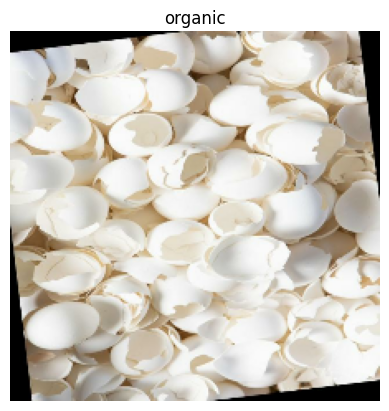

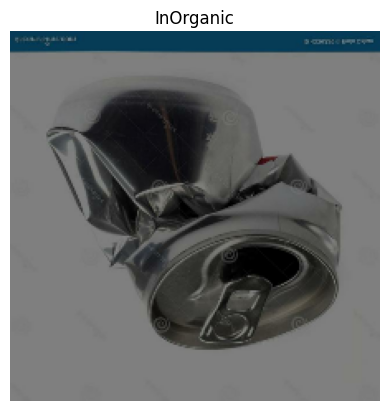

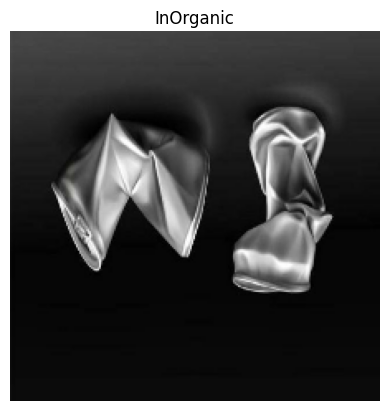

In [ ]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(3):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("InOrganic" if preds[i] < 0.5 else "organic")
        plt.axis("off")
        plt.show()